In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier

import xgboost as xgb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


# CarDriver

In [8]:
filtered_data = data[data['CarDriver'] == 1]


In [4]:
data['BeddystoCC'] = np.log(data['BeddystoCC'])


In [5]:
data['BeddystoCC'].describe()

count    54038.000000
mean         1.088355
std          1.002637
min          0.000000
25%          0.000000
50%          0.916291
75%          1.770706
max          6.410175
Name: BeddystoCC, dtype: float64

In [9]:
filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >=1, 1, 0)

filtered_data['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_5331/3750295439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Bed_days_category'] = np.where(filtered_data['BeddystoCC'] >=1, 1, 0)


1    6845
0    5737
Name: Bed_days_category, dtype: int64

In [10]:
from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male','Female',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7222994900324525
0.7570456754130224
0.7392645314353499
[[1118  599]
 [ 500 1558]]
1    6845
0    5737
Name: Bed_days_category, dtype: int64
0.7088741721854305


In [11]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)


بهترین آستانه با توجه به F1 Score: 0.30303030303030304
مقدار F1 Score بهترین آستانه: 0.7481072232453447


In [16]:

from xgboost import XGBClassifier

X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)



0.7703851925962981
0.7482993197278912
0.7591816613261031
[[1258  459]
 [ 518 1540]]
1    6845
0    5737
Name: Bed_days_category, dtype: int64
0.7411920529801325


In [17]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)


بهترین آستانه با توجه به F1 Score: 0.37373737373737376
مقدار F1 Score بهترین آستانه: 0.7767719143298741


In [12]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision_scores[best_threshold_index]
best_recall = recall_scores[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)
print("مقدار Precision بهترین آستانه:", best_precision)
print("مقدار Recall بهترین آستانه:", best_recall)
print("مقدار Accuracy بهترین آستانه:", best_accuracy)

بهترین آستانه با توجه به F1 Score: 0.30303030303030304
مقدار F1 Score بهترین آستانه: 0.7481072232453447
مقدار Precision بهترین آستانه: 0.6461647225167904
مقدار Recall بهترین آستانه: 0.8882410106899903
مقدار Accuracy بهترین آستانه: 0.6739072847682119


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
X_train_resampled.shape

(10904, 39)

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Create a dictionary of hyperparameters to tune
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'scale_pos_weight': [sum(y_train == 0) / sum(y_train == 1)]
}

# Create an XGBoost classifier with the specified hyperparameters
xgb_clf = xgb.XGBClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='f1_macro', verbose=2, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_xgb_clf = xgb.XGBClassifier(**grid_search.best_params_)
best_xgb_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
y_pred = best_xgb_clf.predict(X_test)

# ارزیابی مدل
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred)
print(f1)

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimato

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimato

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimato

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_esti

/Users/amin/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_esti

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_esti

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_es

[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.355047619047619, subsample=1; total time=   0.1s
[CV] END colsample_bytree=1, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=2, n_es

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_esti

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimato

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estima

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estima

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estima

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_es

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1, n_e

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimato

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_esti

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_esti

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_we

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3, n_es

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_es

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_es

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_we

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_esti

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=2

[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=1

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimato

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_es

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=3, n_es

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estima

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weig

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weig

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=2, n_estimators=200, scale

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, 

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=3, min_child_weig

[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_esti

[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimato

[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.5s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=2, n_estimators=3

[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=100, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.2s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=300, scale_pos_weight=2.356118706235412, subsample=1; total time=   0.4s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, scale_pos_weight=2.356118706235412, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=200, sc

Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 2.356118706235412, 'subsample': 0.6}
Accuracy: 67.14%
              precision    recall  f1-score   support

           0       0.92      0.57      0.71      1735
           1       0.48      0.90      0.63       782

    accuracy                           0.67      2517
   macro avg       0.70      0.73      0.67      2517
weighted avg       0.79      0.67      0.68      2517

0.6289816061013908


In [23]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# پیش از تقسیم داده‌ها به آموزش و آزمون
#ros = RandomOverSampler(random_state=42)

# سپس ادامه کد با داده‌های جدید
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# پارامترهای بهینه برای مدل XGBoost
xgb_params = {
    'colsample_bytree': 0.8,
    'gamma': 0.2,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'n_estimators': 300,
    'scale_pos_weight': 2.356118706235412,
    'subsample': 0.6
}

base_models = [
    ('xgb', XGBClassifier(objective='binary:logistic', random_state=42, **xgb_params)),
    #('rf', RandomForestClassifier(random_state=42)),
    #('dt', DecisionTreeClassifier(random_state=42)),
    #('gb', GradientBoostingClassifier(random_state=42)),
    #('knn', KNeighborsClassifier(n_neighbors=5)),
    #('svc', SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)),
    #('nb', GaussianNB()),
    #('et', ExtraTreesClassifier(random_state=42)),
    #('mlp', MLPClassifier(hidden_layer_sizes=(64,), random_state=42)),
]

# ایجاد مدل رای‌گیری
voting_model = VotingClassifier(estimators=base_models, voting='soft')

# آموزش مدل رای‌گیری
voting_model.fit(X_train_resampled, y_train_resampled)

# ارزیابی مدل
y_pred = voting_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(class_report)
print('Accuracy:', acc)
print('Confusion Matrix:\n', conf_matrix)
print('F1-score:', f1)
precision_meta = precision_score(y_test,y_pred)
recall_meta= recall_score(y_test, y_pred)
f1_meta = f1_score(y_test,y_pred)
print(precision_meta)
print(recall_meta)
print(f1_meta)
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.80      0.47      0.59      1717
           1       0.67      0.90      0.77      2058

    accuracy                           0.71      3775
   macro avg       0.73      0.69      0.68      3775
weighted avg       0.73      0.71      0.69      3775

Accuracy: 0.7051655629139073
Confusion Matrix:
 [[ 810  907]
 [ 206 1852]]
F1-score: 0.7689433257214033
0.6712577020659659
0.8999028182701652
0.7689433257214033
[[ 810  907]
 [ 206 1852]]


# car passanger


In [13]:
filtered_data2 = data[data['CarPngr'] == 1]

In [14]:
filtered_data2['BeddystoCC'].describe()

count    11789.000000
mean         1.028286
std          1.008455
min          0.000000
25%          0.000000
50%          0.810930
75%          1.704748
max          5.814131
Name: BeddystoCC, dtype: float64

In [15]:
filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 1, 1, 0)

filtered_data2['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_5331/727072877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data2['Bed_days_category'] = np.where(filtered_data2['BeddystoCC'] >= 1, 1, 0)


0    6509
1    5280
Name: Bed_days_category, dtype: int64

In [16]:
from xgboost import XGBClassifier

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data2['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.5945548197203826
0.49661954517516904
0.5411922304085733
[[1359  551]
 [ 819  808]]
0    6509
1    5280
Name: Bed_days_category, dtype: int64
0.6126661012157195


In [18]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.24242424242424243
مقدار F1 Score بهترین آستانه: 0.6470858191831115


In [54]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# تولید داده‌ مصنوعی بر اساس ترکیبی از oversampling و undersampling

    # ایجاد یک نمونه یادگیری

    # تقسیم داده‌ها به تمرین و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # oversampling با استفاده از SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # undersampling با استفاده از RandomUnderSampler
rus = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)


# استفاده از توابع

X_train_resampled.shape
# حالا می‌توانید داده‌های متوازنه را به یادگیری مدل می‌دهید

(11574, 39)

In [19]:
from xgboost import XGBClassifier

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data2['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

NameError: name 'X_train_resampled' is not defined

In [56]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.38383838383838387
مقدار F1 Score بهترین آستانه: 0.6151677473921624


In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision_scores[best_threshold_index]
best_recall = recall_scores[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)
print("مقدار Precision بهترین آستانه:", best_precision)
print("مقدار Recall بهترین آستانه:", best_recall)
print("مقدار Accuracy بهترین آستانه:", best_accuracy)

بهترین آستانه با توجه به F1 Score: 0.38383838383838387
مقدار F1 Score بهترین آستانه: 0.6151677473921624
مقدار Precision بهترین آستانه: 0.5095749649696404
مقدار Recall بهترین آستانه: 0.7759601706970128
مقدار Accuracy بهترین آستانه: 0.6140797285835454


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Mtrcyclist

In [17]:

filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [18]:
filtered_data3['BeddystoCC'].describe()

count    11227.000000
mean         1.234482
std          0.999657
min          0.000000
25%          0.405465
50%          1.098612
75%          1.909543
max          6.331502
Name: BeddystoCC, dtype: float64

In [19]:

filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 1, 1, 0)

filtered_data3['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_5331/3800210593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['Bed_days_category'] = np.where(filtered_data3['BeddystoCC'] >= 1, 1, 0)


1    6313
0    4914
Name: Bed_days_category, dtype: int64

In [20]:
from xgboost import XGBClassifier

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data3['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7223942208462333
0.74034902168165
0.7312614259597806
[[ 940  538]
 [ 491 1400]]
1    6313
0    4914
Name: Bed_days_category, dtype: int64
0.6945681211041852


In [24]:

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.26262626262626265
مقدار F1 Score بهترین آستانه: 0.7539699804220144


In [77]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# تولید داده‌ مصنوعی بر اساس ترکیبی از oversampling و undersampling

    # ایجاد یک نمونه یادگیری

    # تقسیم داده‌ها به تمرین و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # oversampling با استفاده از SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # undersampling با استفاده از RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)


# استفاده از توابع

X_train_resampled.shape
# 

(10114, 39)

In [78]:
from xgboost import XGBClassifier

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data3['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7769784172661871
0.7424643046007403
0.7593293672255275
[[1075  403]
 [ 487 1404]]
1    6313
0    4914
Name: Bed_days_category, dtype: int64
0.7358266547937073


In [79]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.33333333333333337
مقدار F1 Score بهترین آستانه: 0.7780126849894292


In [80]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision_scores[best_threshold_index]
best_recall = recall_scores[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)
print("مقدار Precision بهترین آستانه:", best_precision)
print("مقدار Recall بهترین آستانه:", best_recall)
print("مقدار Accuracy بهترین آستانه:", best_accuracy)

بهترین آستانه با توجه به F1 Score: 0.33333333333333337
مقدار F1 Score بهترین آستانه: 0.7780126849894292
مقدار Precision بهترین آستانه: 0.6999154691462384
مقدار Recall بهترین آستانه: 0.8757271285034374
مقدار Accuracy بهترین آستانه: 0.7195013357079252


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PdlCyclist

In [21]:
filtered_data4 = data[data['PdlCyclist'] == 1]
filtered_data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12354 entries, 32 to 54035
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12354 non-null  int64  
 1   BedDys           12354 non-null  int64  
 2   BeddystoCC       12354 non-null  float64
 3   Severity         12354 non-null  int64  
 4   DiedCases        12354 non-null  int64  
 5   DiedBdDys        12354 non-null  int64  
 6   Hsptlsns         12354 non-null  int64  
 7   April            12354 non-null  int64  
 8   August           12354 non-null  int64  
 9   December         12354 non-null  int64  
 10  February         12354 non-null  int64  
 11  January          12354 non-null  int64  
 12  July             12354 non-null  int64  
 13  June             12354 non-null  int64  
 14  March            12354 non-null  int64  
 15  May              12354 non-null  int64  
 16  November         12354 non-null  int64  
 17  October    

In [22]:
filtered_data4['BeddystoCC'].describe()

count    12354.000000
mean         0.736632
std          0.819380
min          0.000000
25%          0.000000
50%          0.510826
75%          1.098612
max          4.976734
Name: BeddystoCC, dtype: float64

In [23]:

filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 1, 1, 0)
filtered_data4['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_5331/2659493898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data4['Bed_days_category'] = np.where(filtered_data4['BeddystoCC'] >= 1, 1, 0)


0    8618
1    3736
Name: Bed_days_category, dtype: int64

In [24]:
from xgboost import XGBClassifier

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data4['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.5264367816091954
0.4221198156682028
0.4685421994884911
[[2210  412]
 [ 627  458]]
0    8618
1    3736
Name: Bed_days_category, dtype: int64
0.7197194496897761


In [102]:

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.2828282828282829
مقدار F1 Score بهترین آستانه: 0.674840839424664


In [103]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# تولید داده‌ مصنوعی بر اساس ترکیبی از oversampling و undersampling

    # ایجاد یک نمونه یادگیری

    # تقسیم داده‌ها به تمرین و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # oversampling با استفاده از SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # undersampling با استفاده از RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)


# استفاده از توابع

X_train_resampled.shape

(10386, 39)

In [104]:
from xgboost import XGBClassifier

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data4['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.6765375854214123
0.6967741935483871
0.6865067899451025
[[1434  568]
 [ 517 1188]]
0    6523
1    5831
Name: Bed_days_category, dtype: int64
0.707310493660642


In [105]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.32323232323232326
مقدار F1 Score بهترین آستانه: 0.7000722717417489


In [106]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision_scores[best_threshold_index]
best_recall = recall_scores[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)
print("مقدار Precision بهترین آستانه:", best_precision)
print("مقدار Recall بهترین آستانه:", best_recall)
print("مقدار Accuracy بهترین آستانه:", best_accuracy)

بهترین آستانه با توجه به F1 Score: 0.32323232323232326
مقدار F1 Score بهترین آستانه: 0.7000722717417489
مقدار Precision بهترین آستانه: 0.5940310711365495
مقدار Recall بهترین آستانه: 0.852199413489736
مقدار Accuracy بهترین آستانه: 0.6641489074723496


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pedestrian

In [25]:
filtered_data5 = data[data['Pedestrian'] == 1]
filtered_data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6086 entries, 0 to 54037
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       6086 non-null   int64  
 1   BedDys           6086 non-null   int64  
 2   BeddystoCC       6086 non-null   float64
 3   Severity         6086 non-null   int64  
 4   DiedCases        6086 non-null   int64  
 5   DiedBdDys        6086 non-null   int64  
 6   Hsptlsns         6086 non-null   int64  
 7   April            6086 non-null   int64  
 8   August           6086 non-null   int64  
 9   December         6086 non-null   int64  
 10  February         6086 non-null   int64  
 11  January          6086 non-null   int64  
 12  July             6086 non-null   int64  
 13  June             6086 non-null   int64  
 14  March            6086 non-null   int64  
 15  May              6086 non-null   int64  
 16  November         6086 non-null   int64  
 17  October      

In [26]:
filtered_data5['BeddystoCC'].describe()

count    6086.000000
mean        1.434301
std         1.164476
min         0.000000
25%         0.405465
50%         1.386294
75%         2.302585
max         6.410175
Name: BeddystoCC, dtype: float64

In [27]:

filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 1, 1, 0)
filtered_data5['Bed_days_category'].value_counts()

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_5331/3053890577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data5['Bed_days_category'] = np.where(filtered_data5['BeddystoCC'] >= 1, 1, 0)


1    3662
0    2424
Name: Bed_days_category, dtype: int64

In [28]:
from xgboost import XGBClassifier

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data5['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7208297320656871
0.7513513513513513
0.7357741508601676
[[393 323]
 [276 834]]
1    3662
0    2424
Name: Bed_days_category, dtype: int64
0.671960569550931


In [111]:

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.30303030303030304
مقدار F1 Score بهترین آستانه: 0.7666539779215835


In [112]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# تولید داده‌ مصنوعی بر اساس ترکیبی از oversampling و undersampling

    # ایجاد یک نمونه یادگیری

    # تقسیم داده‌ها به تمرین و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # oversampling با استفاده از SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # undersampling با استفاده از RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)


# استفاده از توابع

X_train_resampled.shape

(5826, 39)

In [113]:
from xgboost import XGBClassifier

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data5['Bed_days_category']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test,y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test,y_pred_xgb)
print(precision_xgb)
print(recall_xgb)
print(f1_xgb)
print(confusion_matrix(y_true=y_test,y_pred=y_pred_xgb))
print(y.value_counts())
print(accuracy_xgb)

0.7904306220095694
0.7441441441441441
0.7665893271461717
[[497 219]
 [284 826]]
1    3662
0    2424
Name: Bed_days_category, dtype: int64
0.7245345016429354


In [114]:
# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)

بهترین آستانه با توجه به F1 Score: 0.29292929292929293
مقدار F1 Score بهترین آستانه: 0.7894736842105263


In [115]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# برای محاسبه احتمالات پیش‌بینی هر کلاس
y_pred_proba_svm = xgb_model.predict_proba(X_test)
# در اینجا y_pred_proba_svm یک آرایه با ابعاد (تعداد نمونه‌ها، تعداد کلاس‌ها) است

# حالا برای هر آستانه ممکن احتمالات را به پیش‌بینی تبدیل می‌کنیم
thresholds = np.linspace(0, 1, 100)
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_svm[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_threshold))
    precision_scores.append(precision_score(y_test, y_pred_threshold))
    recall_scores.append(recall_score(y_test, y_pred_threshold))
    accuracy_scores.append(accuracy_score(y_test, y_pred_threshold))

# بهترین آستانه را با توجه به F1 Score پیدا می‌کنیم
best_threshold_index = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]
best_precision = precision_scores[best_threshold_index]
best_recall = recall_scores[best_threshold_index]
best_accuracy = accuracy_scores[best_threshold_index]

print("بهترین آستانه با توجه به F1 Score:", best_threshold)
print("مقدار F1 Score بهترین آستانه:", best_f1_score)
print("مقدار Precision بهترین آستانه:", best_precision)
print("مقدار Recall بهترین آستانه:", best_recall)
print("مقدار Accuracy بهترین آستانه:", best_accuracy)

بهترین آستانه با توجه به F1 Score: 0.29292929292929293
مقدار F1 Score بهترین آستانه: 0.7894736842105263
مقدار Precision بهترین آستانه: 0.7081545064377682
مقدار Recall بهترین آستانه: 0.8918918918918919
مقدار Accuracy بهترین آستانه: 0.7108433734939759


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


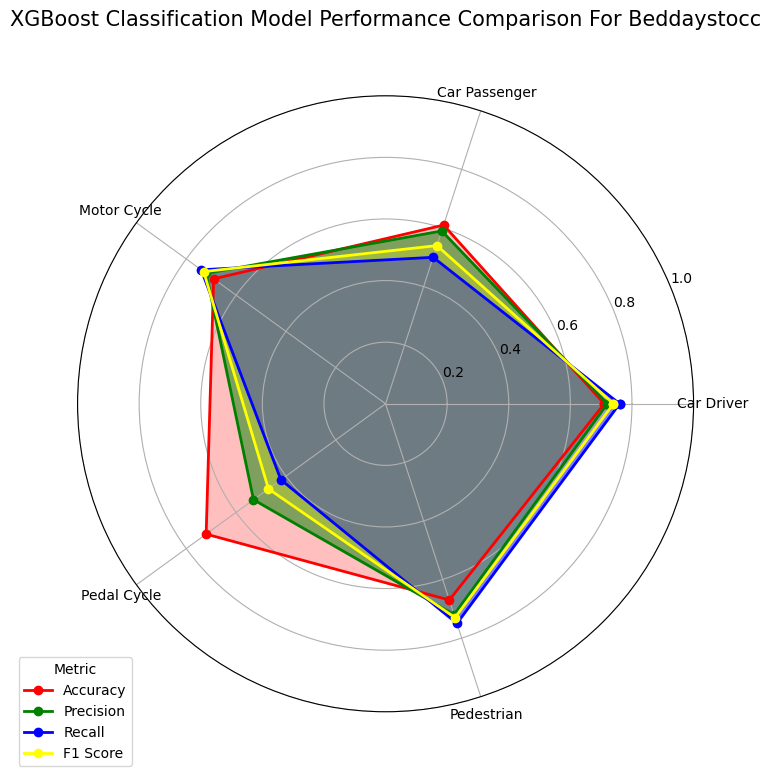

In [29]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = [0.71         , 0.61,              0.69          , 0.72            , 0.67]
precision = [0.72       , 0.59,             0.72          , 0.53            , 0.72]
recall = [0.76           , 0.50,                 0.74          , 0.42            , 0.75]
f1_score = [0.74        ,     0.54  ,      0.73          , 0.47            , 0.73]

labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

data = np.array([accuracy, precision, recall, f1_score])

num_vars = data.shape[1]

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] 

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

colors = ['red', 'green', 'blue', 'yellow']
labels_metric = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'Precision' or label == 'Recall':
        alpha_value = 0.5  
    else:
        alpha_value = 0.25  
    data_slice = np.concatenate([data_slice, [data_slice[0]]])
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  
ax.set_xticklabels(labels)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])  
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'])

plt.title('XGBoost Classification Model Performance Comparison For Beddaystocc', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
